In [9]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

#seaborn setting
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

데이터 읽고 간단한 전처리

In [10]:
cap_daily = pd.read_csv('(starting data) cleaned_cap.csv')
cap_daily = cap_daily.set_index(pd.to_datetime(cap_daily['Unnamed: 0'].values,format ='%Y-%m-%d'))
cap_daily = cap_daily.drop('Unnamed: 0',axis=1)['1999-01-04':].copy()
return_daily = pd.read_csv('(starting data) cleaned_return.csv')
return_daily = return_daily.set_index(pd.to_datetime(return_daily['Unnamed: 0'].values,format ='%Y-%m-%d'))  #인덱스 날짜로
return_daily = return_daily.drop('Unnamed: 0',axis=1)
three_factor_daily = pd.read_csv('(starting data) three_factor_daily.csv')
three_factor_daily = three_factor_daily.set_index(three_factor_daily['Unnamed: 0'].values).drop('Unnamed: 0',axis=1)['1999-01-04':].copy()

In [3]:
return_daily.tail()

,A005930,A000660,A068270,A005380,A207940,A051910,A005490,A015760,A035420,A017670,...,A121910,A122290,A122750,A192520,A192530,A900030,A900050,A950010,A950070,A950100
2019-01-07,3.47,0.69,-1.82,0.84,1.84,3.78,2.93,-0.58,4.78,-1.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,-1.68,0.85,-1.16,-0.83,-0.52,1.90,-0.20,3.96,-1.14,-0.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-09,3.94,7.43,0.23,2.93,0.26,0.72,4.07,-5.36,2.31,-2.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-10,0.51,2.67,1.17,0.00,0.26,-1.42,1.17,2.68,-1.50,0.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-11,1.76,-0.31,0.00,0.00,1.93,0.58,-1.16,0.73,0.00,-2.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cap_daily.tail()

,A005930,A000660,A005380,A068270,A051910,A207940,A005490,A028260,A035420,A012330,...,A900050,A900060,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100
2019-01-28,"268,938,704","52,270,570","27,029,026","26,471,244","26,436,832","26,598,330","23,453,259","22,383,425","21,755,368","21,172,290",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-29,"271,625,106","53,435,374","27,349,528","26,408,516","26,683,906","25,936,680","23,409,665","22,667,960","22,414,622","21,512,994",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-30,"276,997,910","55,255,380","27,670,030","26,973,069","26,754,498","25,672,020","24,848,248","22,667,960","22,414,622","21,853,697",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-31,"275,505,465","53,799,375","27,670,030","27,474,893","25,977,982","26,399,835","23,889,193","22,762,805","22,414,622","21,902,369",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-01,"276,699,421","55,255,380","27,670,030","26,910,341","25,977,982","25,705,103","23,584,039","22,288,580","22,002,588","21,805,025",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
three_factor_daily.head()

,Mkt-Rf,SMB,HML,Rf
1999-01-04,0.044351,-0.015629,0.014568,0.000249
1999-01-05,0.018453,0.008151,0.027304,0.000247
1999-01-06,0.022854,0.017445,0.025774,0.000246
1999-01-07,0.040954,-0.022825,0.000097,0.000246
1999-01-08,-0.017945,0.015147,0.017707,0.000245


In [5]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.datasets import make_regression

col_list = return_daily.columns
date_lis = three_factor_daily.index[:500]
# date_lis = three_factor_daily

ols_result_df = pd.DataFrame(columns=['Symbol','Date','tVol','iVol','Beta'])
ivol_list = []
tvol_list =[]
beta_list=[]
date_list = []
symbol_list = []

for k,col in enumerate(col_list):
    print((k+1)/len(col_list))
    
    for i,date in enumerate(date_lis):
        try:
            start_date = date_lis[i]
            end_date = date_lis[i+219]
            reval_date = str(pd.date_range(date_lis[i+219], periods=3)[-1]).split(' ')[0]

            temp = three_factor_daily[start_date:end_date]
            temp['Return']= return_daily[start_date:end_date][col].values
            temp['Ret-Rf'] = temp['Return']-temp['Rf']
            
            if len(temp.dropna())<=200:
                pass
            
            else:
                ols_temp = temp[['Ret-Rf','Mkt-Rf','SMB','HML']]
                ols_temp = sm.add_constant(ols_temp)
                x_train = ols_temp[['const','Mkt-Rf','SMB','HML']]
                y_train = ols_temp['Ret-Rf']
                result = sm.OLS(y_train,x_train).fit()

                ivol_list.append(np.std(temp['Ret-Rf']-result.predict()))
                beta_list.append(result.params[1])
                tvol_list.append(np.std(temp['Return']))                
                date_list.append(reval_date)
                symbol_list.append(col)
            
        except:
            break
            
ols_result_df['Symbol']=symbol_list
ols_result_df['Date']= date_list
ols_result_df['tVol']=tvol_list
ols_result_df['iVol']=ivol_list
ols_result_df['Beta']=beta_list

#파일저장
ols_result_df.to_csv('low_ols_result_500days.csv')


0.0008764241893076249
0.0017528483786152498
0.0026292725679228747
0.0035056967572304996
0.0043821209465381246
0.0052585451358457495
0.006134969325153374
0.007011393514460999
0.007887817703768623
0.008764241893076249
0.009640666082383873
0.010517090271691499
0.011393514460999123
0.012269938650306749
0.013146362839614373
0.014022787028921999
0.014899211218229623
0.015775635407537247
0.016652059596844872
0.017528483786152498
0.018404907975460124
0.019281332164767746
0.020157756354075372
0.021034180543382998
0.021910604732690624
0.022787028921998246
0.02366345311130587
0.024539877300613498
0.025416301489921123
0.026292725679228746
0.02716914986853637
0.028045574057843997
0.028921998247151623
0.029798422436459245
0.03067484662576687
0.03155127081507449
0.03242769500438212
0.033304119193689745
0.03418054338299737
0.035056967572304996
0.03593339176161262
0.03680981595092025
0.03768624014022787
0.03856266432953549
0.03943908851884312
0.040315512708150744
0.04119193689745837
0.04206836108676599

0.3637160385626643
0.36459246275197194
0.3654688869412796
0.3663453111305872
0.3672217353198948
0.36809815950920244
0.3689745836985101
0.3698510078878177
0.37072743207712533
0.37160385626643294
0.37248028045574055
0.3733567046450482
0.37423312883435583
0.37510955302366344
0.37598597721297106
0.3768624014022787
0.37773882559158634
0.37861524978089395
0.37949167397020156
0.3803680981595092
0.38124452234881684
0.38212094653812445
0.38299737072743206
0.3838737949167397
0.38475021910604734
0.38562664329535495
0.38650306748466257
0.3873794916739702
0.38825591586327785
0.38913234005258546
0.39000876424189307
0.3908851884312007
0.39176161262050835
0.39263803680981596
0.39351446099912357
0.3943908851884312
0.39526730937773885
0.39614373356704646
0.3970201577563541
0.3978965819456617
0.3987730061349693
0.39964943032427697
0.4005258545135846
0.4014022787028922
0.4022787028921998
0.40315512708150747
0.4040315512708151
0.4049079754601227
0.4057843996494303
0.406660823838738
0.4075372480280456
0.408

0.740578439964943
0.7414548641542507
0.7423312883435583
0.7432077125328659
0.7440841367221736
0.7449605609114811
0.7458369851007888
0.7467134092900964
0.747589833479404
0.7484662576687117
0.7493426818580193
0.7502191060473269
0.7510955302366346
0.7519719544259421
0.7528483786152498
0.7537248028045574
0.754601226993865
0.7554776511831727
0.7563540753724802
0.7572304995617879
0.7581069237510956
0.7589833479404031
0.7598597721297108
0.7607361963190185
0.761612620508326
0.7624890446976337
0.7633654688869412
0.7642418930762489
0.7651183172655566
0.7659947414548641
0.7668711656441718
0.7677475898334793
0.768624014022787
0.7695004382120947
0.7703768624014022
0.7712532865907099
0.7721297107800176
0.7730061349693251
0.7738825591586328
0.7747589833479404
0.775635407537248
0.7765118317265557
0.7773882559158632
0.7782646801051709
0.7791411042944786
0.7800175284837861
0.7808939526730938
0.7817703768624014
0.782646801051709
0.7835232252410167
0.7843996494303243
0.7852760736196319
0.7861524978089395


- OLS 파일 저장 후 다시 불러오고 시작

In [7]:
ols_result_df = pd.read_csv('low_ols_result_500days.csv')
ols_result_df = ols_result_df.drop('Unnamed: 0',axis=1)
ols_result_df.head()

,Symbol,Date,tVol,iVol,Beta
0,A005930,1999-11-19,4.051793,2.400357,129.528489
1,A005930,1999-11-20,4.006710,2.374895,127.476221
2,A005930,1999-11-21,4.006261,2.380694,126.850655
3,A005930,1999-11-24,4.009144,2.374363,126.403295
4,A005930,1999-11-25,3.986697,2.375361,125.843991


In [8]:
##인덱스 설정
ols_result_df['Year'] = ols_result_df['Date'].apply(lambda x: x.split('-')[0])
ols_result_df['Month'] = ols_result_df['Date'].apply(lambda x: x.split('-')[1])
ols_result_df['Day'] = ols_result_df['Date'].apply(lambda x: x.split('-')[2])
ols_result_df.set_index(['Symbol','Year','Month','Day'],inplace = True)
ols_result_df.head()

Date      tVol      iVol        Beta
Symbol  Year Month Day                                            
A005930 1999 11    19   1999-11-19  4.051793  2.400357  129.528489
                   20   1999-11-20  4.006710  2.374895  127.476221
                   21   1999-11-21  4.006261  2.380694  126.850655
                   24   1999-11-24  4.009144  2.374363  126.403295
                   25   1999-11-25  3.986697  2.375361  125.843991

In [31]:
##수익률, 시총 merge
return_daily = return_daily.reset_index()
cap_daily = cap_daily[:'2019-01-11'].copy()
cap_daily = cap_daily.reset_index()
col_list = return_daily.columns[1:]
temp_return_lagcap = pd.DataFrame(columns=['Symbol','Year','Month','Day','Return','LagCap'])

for i,col in enumerate(col_list):
    print(i/len(col_list))
    temp_df = pd.DataFrame(columns=['Symbol','Year','Month','Day','Return','LagCap'])
    year = return_daily['index'].apply(lambda x: str(x).split('-')[0]).values
    month = return_daily['index'].apply(lambda x: str(x).split('-')[1]).values
    day = return_daily['index'].apply(lambda x: str(x).split('-')[2]).values
    returns = return_daily[col].values
    lagcap = cap_daily[col].values

    temp_df['Year'] = year
    temp_df['Month']= month
    temp_df['Return'] = returns
    temp_df['Day'] = day
    temp_df['Symbol'] = col
    temp_df['LagCap'] = lagcap
    
    temp_return_lagcap = pd.concat([temp_return_lagcap,temp_df])
    
temp_return_lagcap = temp_return_lagcap.reset_index()
temp_return_lagcap['Day']= temp_return_lagcap['Day'].apply(lambda x: x.split(' ')[0])
temp_return_lagcap.set_index(['Symbol','Year','Month','Day'],inplace = True)
result = pd.merge(temp_return_lagcap,ols_result_df,left_index = True , right_index = True)
result = result.reset_index()
result.to_csv('low_return_lagcap_factor_merged.csv')

0.0
0.0008764241893076249
0.0017528483786152498
0.0026292725679228747
0.0035056967572304996
0.0043821209465381246
0.0052585451358457495
0.006134969325153374
0.007011393514460999
0.007887817703768623
0.008764241893076249
0.009640666082383873
0.010517090271691499
0.011393514460999123
0.012269938650306749
0.013146362839614373
0.014022787028921999
0.014899211218229623
0.015775635407537247
0.016652059596844872
0.017528483786152498
0.018404907975460124
0.019281332164767746
0.020157756354075372
0.021034180543382998
0.021910604732690624
0.022787028921998246
0.02366345311130587
0.024539877300613498
0.025416301489921123
0.026292725679228746
0.02716914986853637
0.028045574057843997
0.028921998247151623
0.029798422436459245
0.03067484662576687
0.03155127081507449
0.03242769500438212
0.033304119193689745
0.03418054338299737
0.035056967572304996
0.03593339176161262
0.03680981595092025
0.03768624014022787
0.03856266432953549
0.03943908851884312
0.040315512708150744
0.04119193689745837
0.0420683610867

0.3628396143733567
0.3637160385626643
0.36459246275197194
0.3654688869412796
0.3663453111305872
0.3672217353198948
0.36809815950920244
0.3689745836985101
0.3698510078878177
0.37072743207712533
0.37160385626643294
0.37248028045574055
0.3733567046450482
0.37423312883435583
0.37510955302366344
0.37598597721297106
0.3768624014022787
0.37773882559158634
0.37861524978089395
0.37949167397020156
0.3803680981595092
0.38124452234881684
0.38212094653812445
0.38299737072743206
0.3838737949167397
0.38475021910604734
0.38562664329535495
0.38650306748466257
0.3873794916739702
0.38825591586327785
0.38913234005258546
0.39000876424189307
0.3908851884312007
0.39176161262050835
0.39263803680981596
0.39351446099912357
0.3943908851884312
0.39526730937773885
0.39614373356704646
0.3970201577563541
0.3978965819456617
0.3987730061349693
0.39964943032427697
0.4005258545135846
0.4014022787028922
0.4022787028921998
0.40315512708150747
0.4040315512708151
0.4049079754601227
0.4057843996494303
0.406660823838738
0.407

0.7397020157756354
0.740578439964943
0.7414548641542507
0.7423312883435583
0.7432077125328659
0.7440841367221736
0.7449605609114811
0.7458369851007888
0.7467134092900964
0.747589833479404
0.7484662576687117
0.7493426818580193
0.7502191060473269
0.7510955302366346
0.7519719544259421
0.7528483786152498
0.7537248028045574
0.754601226993865
0.7554776511831727
0.7563540753724802
0.7572304995617879
0.7581069237510956
0.7589833479404031
0.7598597721297108
0.7607361963190185
0.761612620508326
0.7624890446976337
0.7633654688869412
0.7642418930762489
0.7651183172655566
0.7659947414548641
0.7668711656441718
0.7677475898334793
0.768624014022787
0.7695004382120947
0.7703768624014022
0.7712532865907099
0.7721297107800176
0.7730061349693251
0.7738825591586328
0.7747589833479404
0.775635407537248
0.7765118317265557
0.7773882559158632
0.7782646801051709
0.7791411042944786
0.7800175284837861
0.7808939526730938
0.7817703768624014
0.782646801051709
0.7835232252410167
0.7843996494303243
0.7852760736196319


,Symbol,Year,Month,Day,Return,LagCap,Date,tVol,iVol,Beta


- lag,return + ols_result_df = result

In [4]:
result = pd.read_csv('low_return_lagcap_factor_merged.csv').drop('Unnamed: 0',axis=1)
result.head()

,Symbol,Year,Month,Day,Return,LagCap,Date,tVol,iVol,Beta
0,A000010,1999,11,19,-1.80,"3,401,226",1999-11-19,5.011633,4.381741,64.755814
1,A000010,1999,11,24,-4.38,"2,995,575",1999-11-24,5.009577,4.382701,65.377787
2,A000010,1999,11,25,-8.33,"2,745,944",1999-11-25,5.018107,4.376178,66.387921
3,A000010,1999,11,26,-7.95,"2,527,516",1999-11-26,4.978890,4.324104,69.312585
4,A000010,1999,12,1,2.23,"2,571,202",1999-12-01,5.009116,4.323774,70.631102


# 1. tvol

In [46]:
##tvol_10분위 나누기
result = result.dropna()
years = np.sort(result['Year'].unique())
months = np.sort(result['Month'].unique())
days = np.sort(result['Day'].unique())
next_result = result.drop(['iVol','Beta'],axis=1).sort_values(by=['Year','Month','Day','tVol']).copy()
decile_list = []
for year in years:
    
    check_df = next_result[next_result['Year']==year]
    
    for month in months:
        if month not in check_df['Month'].unique():
            pass
        else:
            for day in days:
                if day in check_df[check_df['Month']==month]['Day'].unique():
                    print(day)

                    bp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').quantile(0.1)['tVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').copy()
                    temp2 = temp1[temp1['tVol']<=bp1]
                    temp2['decile'] = 'D1'
                    decile_list.append(temp2['decile'].values)
                    print('1분위',bp1,len(temp2))

                    bp2 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').quantile(0.2)['tVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').copy()
                    temp2 = temp1[(temp1['tVol']> bp1)&(temp1['tVol']<=bp2)]
                    temp2['decile'] = 'D2'
                    decile_list.append(temp2['decile'].values)
                    print('2분위',bp2,len(temp2))

                    bp3 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').quantile(0.3)['tVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').copy()
                    temp2 = temp1[(temp1['tVol']> bp2)&(temp1['tVol']<=bp3)]
                    temp2['decile'] = 'D3'
                    decile_list.append(temp2['decile'].values)
                    print('3분위',bp3,len(temp2))

                    bp4 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').quantile(0.4)['tVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').copy()
                    temp2 = temp1[(temp1['tVol']> bp3)&(temp1['tVol']<=bp4)]
                    temp2['decile'] = 'D4'
                    decile_list.append(temp2['decile'].values)
                    print('4분위',bp4,len(temp2))

                    bp5 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').quantile(0.5)['tVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').copy()
                    temp2 = temp1[(temp1['tVol']> bp4)&(temp1['tVol']<=bp5)]
                    temp2['decile'] = 'D5'
                    decile_list.append(temp2['decile'].values)
                    print('5분위',bp5,len(temp2))

                    bp6 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').quantile(0.6)['tVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').copy()
                    temp2 = temp1[(temp1['tVol']> bp5)&(temp1['tVol']<=bp6)]
                    temp2['decile'] = 'D6'
                    decile_list.append(temp2['decile'].values)
                    print('6분위',bp6,len(temp2))


                    bp7 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').quantile(0.7)['tVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').copy()
                    temp2 = temp1[(temp1['tVol']> bp6)&(temp1['tVol']<=bp7)]
                    temp2['decile'] = 'D7'
                    decile_list.append(temp2['decile'].values)
                    print('7분위',bp7,len(temp2))    

                    bp8 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').quantile(0.8)['tVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').copy()
                    temp2 = temp1[(temp1['tVol']> bp7)&(temp1['tVol']<=bp8)]
                    temp2['decile'] = 'D8'
                    decile_list.append(temp2['decile'].values)
                    print('8분위',bp8,len(temp2))

                    bp9 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').quantile(0.9)['tVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').copy()
                    temp2 = temp1[(temp1['tVol']> bp8)&(temp1['tVol']<=bp9)]
                    temp2['decile'] = 'D9'
                    decile_list.append(temp2['decile'].values)
                    print('9분위',bp9,len(temp2))

                    bp10 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').quantile(1)['tVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='tVol').copy()
                    temp2 = temp1[(temp1['tVol']> bp9)&(temp1['tVol']<=bp10)]
                    temp2['decile'] = 'D10'
                    decile_list.append(temp2['decile'].values)
                    print('10분위',bp10,len(temp2))          

                else:
                    pass
deciles =[]
for decile in decile_list:
    deciles.extend(decile)
print(len(deciles))
print(len(next_result))
next_result['decile'] = deciles
next_result = next_result.reset_index(drop = True)
next_result.head(50)            

19
1분위 3.7452311354186274 69
2분위 4.150574539987462 69
3분위 4.439054814912124 69
4분위 4.735004036680944 69
5분위 5.000636964386314 69
6분위 5.292374555293174 68
7분위 5.6546817610119 69
8분위 6.041318993764451 69
9분위 6.67979503854869 69
10분위 13.190311061564335 69
24
1분위 3.6940423339382042 69
2분위 4.09643658057967 69
3분위 4.40049414451882 69
4분위 4.6726388329721065 69
5분위 4.949844062991669 69
6분위 5.254024525238994 68
7분위 5.5983226078602994 69
8분위 5.983434524921567 69
9분위 6.6618982530059085 69
10분위 13.638150493231587 69
25
1분위 3.692612934309249 69
2분위 4.082183949719146 69
3분위 4.3955319946983495 69
4분위 4.6683556765516645 68
5분위 4.945004805364672 69
6분위 5.235672322700645 69
7분위 5.590373513356087 68
8분위 5.9759027095210895 69
9분위 6.631078251824753 69
10분위 8.936423750838223 69
26
1분위 3.6944048284358093 69
2분위 4.080180867562282 69
3분위 4.387993703472633 69
4분위 4.672564716723382 68
5분위 4.945396316456355 69
6분위 5.241029523118401 69
7분위 5.5796637925295585 68
8분위 5.978101426666852 69
9분위 6.635450619667605 69
10분

5분위 5.075013966380831 68
6분위 5.354092434146839 69
7분위 5.682118844414001 68
8분위 6.165799187942557 69
9분위 6.853484738997585 68
10분위 9.054794905289658 69
17
1분위 3.941708479209053 69
2분위 4.299383594104648 69
3분위 4.562395694302636 68
4분위 4.771354237781628 69
5분위 5.076287352799602 68
6분위 5.3397201113699415 69
7분위 5.692372699767285 68
8분위 6.164730258756106 69
9분위 6.8479654547181905 68
10분위 9.062455933321193 69
18
1분위 3.9435441989208924 69
2분위 4.302111115439345 69
3분위 4.561423894584792 68
4분위 4.769176641173059 69
5분위 5.067512979902465 68
6분위 5.337391043268268 69
7분위 5.698713998837399 68
8분위 6.186301228060068 69
9분위 6.85154577108322 68
10분위 9.059105108208547 69
23
1분위 3.9753895848817384 69
2분위 4.311883625852228 69
3분위 4.582030808355285 68
4분위 4.7865490027129045 69
5분위 5.092363769238974 68
6분위 5.3679265036275545 69
7분위 5.712920437711182 68
8분위 6.198098595403843 69
9분위 6.878387056180946 68
10분위 9.167804063408056 69
24
1분위 3.979250004922223 69
2분위 4.3441351256227545 69
3분위 4.586079809815053 68
4분위

8분위 6.582330030466553 68
9분위 7.18898389748232 68
10분위 9.425329845380208 69
19
1분위 4.268432112136584 69
2분위 4.609198586846512 68
3분위 4.854709441885534 69
4분위 5.176102883755222 68
5분위 5.402124474196309 69
6분위 5.698956041749193 68
7분위 6.127974499699798 68
8분위 6.615909285316292 69
9분위 7.220597788468366 68
10분위 9.416775585939725 69
24
1분위 4.283122391859602 69
2분위 4.62153693773133 68
3분위 4.892474162684648 68
4분위 5.215864038874594 69
5분위 5.452470906270637 68
6분위 5.749979642254075 68
7분위 6.211940595190686 69
8분위 6.6700040530875695 68
9분위 7.265259982426708 68
10분위 9.487648818615282 69
25
1분위 4.299359944435495 69
2분위 4.608460392886492 68
3분위 4.896820710410344 68
4분위 5.222501022482675 69
5분위 5.456988533211386 68
6분위 5.7495254818973685 68
7분위 6.247876017749695 69
8분위 6.676400205812402 68
9분위 7.295867100661459 68
10분위 9.51264423213599 69
26
1분위 4.275709591989489 69
2분위 4.641776494370982 68
3분위 4.913297527046453 68
4분위 5.216602281957366 69
5분위 5.487193151339069 68
6분위 5.763146551903988 68
7분위 6.2616

3분위 5.053162639267162 69
4분위 5.334777903485037 68
5분위 5.59247622456404 69
6분위 5.871333760379147 68
7분위 6.2726028092342965 68
8분위 6.652660041753389 69
9분위 7.215276169705275 68
10분위 9.411581928820073 69
10
1분위 4.298790024611632 69
2분위 4.73511194419357 68
3분위 5.058255284372211 69
4분위 5.335791975839298 68
5분위 5.591969297850191 69
6분위 5.871111130094619 68
7분위 6.271325631087031 68
8분위 6.629335227679556 69
9분위 7.223618609456523 68
10분위 9.411581928820073 69
11
1분위 4.310074129077216 69
2분위 4.732608184858353 68
3분위 5.06612288986592 69
4분위 5.338041785949798 68
5분위 5.594230184893203 69
6분위 5.895486239922331 68
7분위 6.279100268648387 68
8분위 6.652815267858019 69
9분위 7.221928559747665 68
10분위 9.420426380043429 69
16
1분위 4.317690115711109 69
2분위 4.75931576088351 68
3분위 5.07219133641126 69
4분위 5.3510844668164905 68
5분위 5.60329936213795 69
6분위 5.920771700286935 68
7분위 6.295983762165264 68
8분위 6.687105927130327 69
9분위 7.225514933188087 68
10분위 9.476472904880916 69
18
1분위 4.319958460299968 69
2분위 4.7567456

8분위 6.884836311979441 69
9분위 7.735166631751907 69
10분위 10.422837847409335 69
3
1분위 4.296187982277608 69
2분위 4.800077161025554 69
3분위 5.082969227873206 69
4분위 5.405979805593493 68
5분위 5.660054597101073 69
6분위 5.988580224610942 69
7분위 6.375030639279111 68
8분위 6.904549891314579 69
9분위 7.737429467436476 69
10분위 10.449419100762897 69
8
1분위 4.260561379112783 69
2분위 4.761178020530796 69
3분위 5.065161153058223 69
4분위 5.384576737876411 69
5분위 5.660550998207313 69
6분위 5.998065658757316 68
7분위 6.348308286816199 69
8분위 6.929530941999415 69
9분위 7.7311811886396455 69
10분위 10.425410491056207 69
9
1분위 4.251884868141113 69
2분위 4.734760940597745 69
3분위 5.050251599287515 69
4분위 5.371776197640804 69
5분위 5.659775711760849 69
6분위 5.982177932629209 68
7분위 6.337944811344871 69
8분위 6.932754290659859 69
9분위 7.719413820693579 69
10분위 10.425473951213828 69
10
1분위 4.246086686596273 69
2분위 4.689013687530871 69
3분위 5.04082830270702 69
4분위 5.341341106800621 69
5분위 5.636795155585585 69
6분위 5.957630439641408 68
7분위 6.32

In [50]:
##시총가중
next_result['LagCap'] = next_result['LagCap'].astype('str') 
next_result['LagCap'] = pd.to_numeric(next_result['LagCap'].apply(lambda x: x.replace(',',''))) #replace 는 str 형만 가능!
next_result['weighted_cap'] = next_result.groupby(['Year','Month','Day','decile'])['LagCap'].apply(lambda x: x/np.sum(x))
next_result['weighted_Return'] = next_result['weighted_cap'] * (next_result['Return']/100)
next_result.head(50)

,Symbol,Year,Month,Day,Return,LagCap,Date,tVol,decile,weighted_cap,weighted_Return
0,A000390,1999,11,19,0.55,62436.0,1999-11-19,2.755032,D1,0.000925,5.085930e-06
1,A002000,1999,11,19,-0.92,258638.0,1999-11-19,2.823283,D1,0.003831,-3.524137e-05
2,A029530,1999,11,19,11.86,442009.0,1999-11-19,2.861650,D1,0.006546,7.764051e-04
3,A017390,1999,11,19,-0.95,218400.0,1999-11-19,2.901794,D1,0.003235,-3.072903e-05
4,A007340,1999,11,19,0.00,92074.0,1999-11-19,2.945361,D1,0.001364,0.000000e+00
5,A000100,1999,11,19,0.00,191339.0,1999-11-19,2.964649,D1,0.002834,0.000000e+00
6,A004310,1999,11,19,0.00,34769.0,1999-11-19,2.967517,D1,0.000515,0.000000e+00
7,A004370,1999,11,19,1.06,361601.0,1999-11-19,3.025268,D1,0.005356,5.676858e-05
8,A002390,1999,11,19,0.16,37468.0,1999-11-19,3.025792,D1,0.000555,8.878775e-07
9,A008020,1999,11,19,0.74,40375.0,1999-11-19,3.032888,D1,0.000598,4.425036e-06


In [2]:
next_result = pd.read_csv('plot_tvol_df.csv').drop('Unnamed: 0',axis=1)
next_result.head()

,Symbol,Year,Month,Day,Return,LagCap,Date,tVol,decile,weighted_cap,weighted_Return
0,A000390,1999,11,19,0.55,62436.0,1999-11-19,2.755032,D1,0.000925,0.000005
1,A002000,1999,11,19,-0.92,258638.0,1999-11-19,2.823283,D1,0.003831,-0.000035
2,A029530,1999,11,19,11.86,442009.0,1999-11-19,2.861650,D1,0.006546,0.000776
3,A017390,1999,11,19,-0.95,218400.0,1999-11-19,2.901794,D1,0.003235,-0.000031
4,A007340,1999,11,19,0.00,92074.0,1999-11-19,2.945361,D1,0.001364,0.000000


In [8]:
next_result.groupby('Symbol')

,Year,Month,Day,Return,LagCap,Date,tVol,decile,weighted_cap,weighted_Return
Symbol,,,,,,,,,,
A000010,158,158,158,158,158,158,158,158,158,158
A000020,158,158,158,158,158,158,158,158,158,158
A000030,158,158,158,158,158,158,158,158,158,158
A000040,158,158,158,158,158,158,158,158,158,158
A000050,158,158,158,158,158,158,158,158,158,158
A000060,158,158,158,158,158,158,158,158,158,158
A000070,158,158,158,158,158,158,158,158,158,158
A000080,158,158,158,158,158,158,158,158,158,158
A000100,158,158,158,158,158,158,158,158,158,158


In [5]:
##분위별 수익률
sum_return = pd.DataFrame(next_result.groupby(['Year','Month','Day','decile'])['weighted_Return'].sum())
sum_return = sum_return.reset_index()
sum_return['Date'] = sum_return['Year'].astype('str') +'-'+sum_return['Month'].astype('str')+'-'+sum_return['Day'].astype('str')

#컬럼 순서 재설정
sum_return_T = pd.DataFrame(sum_return.pivot('Date','decile','weighted_Return'),columns=['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10'])
#sum_return_T.to_csv('plot_tvol_df.csv)
sum_return_T.head(50)

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10
Date,,,,,,,,,,
1999-11-19,0.024562,0.025272,0.037995,0.038139,0.051856,0.012953,0.009909,-0.005222,-0.011575,-0.003943
1999-11-24,-0.008019,0.034139,-0.013646,-0.025589,-0.018812,-0.021878,-0.020634,-0.013523,-0.028202,0.030670
1999-11-25,0.029903,0.005099,0.002019,-0.020402,0.034583,-0.004132,-0.017795,-0.001593,-0.004001,0.020285
1999-11-26,-0.012526,-0.001806,-0.020750,-0.046701,-0.008859,-0.050749,-0.075632,-0.052711,-0.057436,-0.045964
1999-12-1,0.009471,0.032369,0.027473,-0.022884,-0.014039,-0.008419,-0.050388,-0.037135,-0.049786,-0.050641
1999-12-10,0.010893,0.024052,0.046087,0.089044,0.091514,0.049637,0.096142,0.043089,0.076768,0.010280
1999-12-15,-0.044739,-0.040491,-0.020513,-0.025413,-0.024309,-0.041733,-0.043681,-0.037158,-0.030570,-0.004229
1999-12-16,-0.013635,-0.015764,0.012715,-0.013902,-0.009602,-0.012572,-0.049220,-0.006022,0.000020,-0.024092
1999-12-17,-0.011495,0.011596,-0.034874,0.001335,-0.022281,0.045469,-0.004326,-0.019652,-0.020818,-0.005764


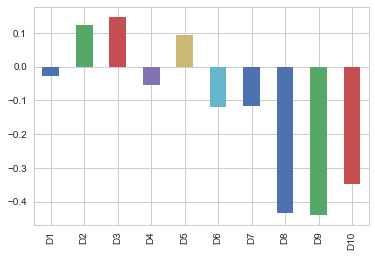

In [6]:
##시각화
#bar_plot

((sum_return_T+1).prod()-1).plot(kind='bar')
plt.show()

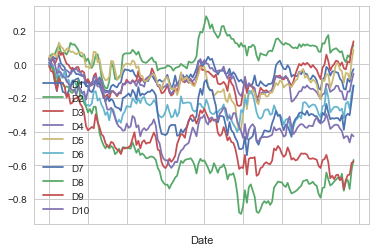

In [18]:
##누적 수익률 곡선
#line plot
log_sum_return_T = np.log(sum_return_T+1)
cum_return_total = pd.DataFrame(index = sum_return_T.index,columns= sum_return_T.columns)
for index in log_sum_return_T.index:
    if index == '1999-11-19':
        cum_return_total.loc[index] = log_sum_return_T.loc['1999-11-19']
    else:
        cum_return_total.loc[index]= (log_sum_return_T.loc[:index]).cumsum().loc[index]
    
cum_return_total.plot(kind='line')

In [16]:
(log_sum_return_T.loc[:'1999-12-1']).cumsum()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10
Date,,,,,,,,,,
1999-11-19,0.024266,0.024958,0.037291,0.037429,0.050556,0.012870,0.009861,-0.005235,-0.011643,-0.003951
1999-11-24,0.016214,0.058528,0.023551,0.011508,0.031565,-0.009251,-0.010989,-0.018851,-0.040250,0.026258
1999-11-25,0.045679,0.063614,0.025567,-0.009106,0.065563,-0.013392,-0.028944,-0.020445,-0.044259,0.046340
1999-11-26,0.033074,0.061806,0.004599,-0.056933,0.056665,-0.065474,-0.107589,-0.074597,-0.103410,-0.000714
1999-12-1,0.042501,0.093662,0.031702,-0.080083,0.042526,-0.073929,-0.159290,-0.112439,-0.154479,-0.052682


# 2. ivol

In [6]:
##ivol_10분위 나누기
result = result.dropna()
years = np.sort(result['Year'].unique())
months = np.sort(result['Month'].unique())
days = np.sort(result['Day'].unique())
next_result = result.drop(['tVol','Beta'],axis=1).sort_values(by=['Year','Month','Day','iVol']).copy()
decile_list = []
for year in years:
    
    check_df = next_result[next_result['Year']==year]
    
    for month in months:
        if month not in check_df['Month'].unique():
            pass
        else:
            for day in days:
                if day in check_df[check_df['Month']==month]['Day'].unique():
                    print(day)

                    bp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').quantile(0.1)['iVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').copy()
                    temp2 = temp1[temp1['iVol']<=bp1]
                    temp2['decile'] = 'D1'
                    decile_list.append(temp2['decile'].values)
                    print('1분위',bp1,len(temp2))

                    bp2 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').quantile(0.2)['iVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').copy()
                    temp2 = temp1[(temp1['iVol']> bp1)&(temp1['iVol']<=bp2)]
                    temp2['decile'] = 'D2'
                    decile_list.append(temp2['decile'].values)
                    print('2분위',bp2,len(temp2))

                    bp3 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').quantile(0.3)['iVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').copy()
                    temp2 = temp1[(temp1['iVol']> bp2)&(temp1['iVol']<=bp3)]
                    temp2['decile'] = 'D3'
                    decile_list.append(temp2['decile'].values)
                    print('3분위',bp3,len(temp2))

                    bp4 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').quantile(0.4)['iVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').copy()
                    temp2 = temp1[(temp1['iVol']> bp3)&(temp1['iVol']<=bp4)]
                    temp2['decile'] = 'D4'
                    decile_list.append(temp2['decile'].values)
                    print('4분위',bp4,len(temp2))

                    bp5 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').quantile(0.5)['iVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').copy()
                    temp2 = temp1[(temp1['iVol']> bp4)&(temp1['iVol']<=bp5)]
                    temp2['decile'] = 'D5'
                    decile_list.append(temp2['decile'].values)
                    print('5분위',bp5,len(temp2))

                    bp6 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').quantile(0.6)['iVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').copy()
                    temp2 = temp1[(temp1['iVol']> bp5)&(temp1['iVol']<=bp6)]
                    temp2['decile'] = 'D6'
                    decile_list.append(temp2['decile'].values)
                    print('6분위',bp6,len(temp2))


                    bp7 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').quantile(0.7)['iVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').copy()
                    temp2 = temp1[(temp1['iVol']> bp6)&(temp1['iVol']<=bp7)]
                    temp2['decile'] = 'D7'
                    decile_list.append(temp2['decile'].values)
                    print('7분위',bp7,len(temp2))    

                    bp8 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').quantile(0.8)['iVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').copy()
                    temp2 = temp1[(temp1['iVol']> bp7)&(temp1['iVol']<=bp8)]
                    temp2['decile'] = 'D8'
                    decile_list.append(temp2['decile'].values)
                    print('8분위',bp8,len(temp2))

                    bp9 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').quantile(0.9)['iVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').copy()
                    temp2 = temp1[(temp1['iVol']> bp8)&(temp1['iVol']<=bp9)]
                    temp2['decile'] = 'D9'
                    decile_list.append(temp2['decile'].values)
                    print('9분위',bp9,len(temp2))

                    bp10 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').quantile(1)['iVol']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='iVol').copy()
                    temp2 = temp1[(temp1['iVol']> bp9)&(temp1['iVol']<=bp10)]
                    temp2['decile'] = 'D10'
                    decile_list.append(temp2['decile'].values)
                    print('10분위',bp10,len(temp2))          

                else:
                    pass
deciles =[]
for decile in decile_list:
    deciles.extend(decile)
print(len(deciles))
print(len(next_result))
next_result['decile'] = deciles
next_result = next_result.reset_index(drop = True)
next_result.head(50)       

19
1분위 3.0654849760759566 69
2분위 3.3625632447962897 69
3분위 3.641195416790132 69
4분위 3.8981895318155755 69
5분위 4.179787621983009 69
6분위 4.552470334138644 68
7분위 4.98597637268691 69
8분위 5.466602955105515 69
9분위 6.196103065466388 69
10분위 13.050347081283569 69
24
1분위 3.029519439097571 69
2분위 3.352184116920045 69
3분위 3.626528449617815 69
4분위 3.8522564112682574 69
5분위 4.167567940737585 69
6분위 4.524402679769398 68
7분위 4.9714914132967 69
8분위 5.424694171886157 69
9분위 6.186745059919394 69
10분위 13.418969642460988 69
25
1분위 3.030184966975345 69
2분위 3.332911235898229 69
3분위 3.6148754331384265 69
4분위 3.8435735491753644 68
5분위 4.143864289614887 69
6분위 4.519354649063056 69
7분위 4.949409462882966 68
8분위 5.408276554155122 69
9분위 6.173031456491944 69
10분위 8.522209108057762 69
26
1분위 3.0265881983828207 69
2분위 3.336241065293351 69
3분위 3.604182528416217 69
4분위 3.8435072048908383 68
5분위 4.1367318275023806 69
6분위 4.52919315126895 69
7분위 4.949661993938411 68
8분위 5.4145622396249244 69
9분위 6.1658238109575985 69
1

6분위 4.733489191536477 69
7분위 5.159661305343414 68
8분위 5.6861690981371975 69
9분위 6.417845703863701 68
10분위 8.833478404645518 69
17
1분위 3.3596074985336513 69
2분위 3.5906658347094 69
3분위 3.8652039608044997 68
4분위 4.0738481473443615 69
5분위 4.37884090841556 68
6분위 4.746161746087799 69
7분위 5.166470684514236 68
8분위 5.686028498173635 69
9분위 6.437170754766758 68
10분위 8.837246398062117 69
18
1분위 3.3379015873889126 69
2분위 3.5923502690716744 69
3분위 3.870173053194925 68
4분위 4.077003041014834 69
5분위 4.375326020011467 68
6분위 4.7423575173438826 69
7분위 5.1791719802645835 68
8분위 5.6998428654804085 69
9분위 6.443431847294623 68
10분위 8.834264162222341 69
23
1분위 3.3587885138003237 69
2분위 3.608663745955439 69
3분위 3.8658217724895776 68
4분위 4.094111985422101 69
5분위 4.410053975598692 68
6분위 4.788834968662148 69
7분위 5.203505244528575 68
8분위 5.7341839142913305 69
9분위 6.435941512958094 68
10분위 8.921273930223919 69
24
1분위 3.364314393784381 69
2분위 3.6172832443656153 69
3분위 3.8736473836317704 68
4분위 4.0962881215565865 

9분위 6.755661500673558 68
10분위 9.156166618996439 69
19
1분위 3.4654728717039918 69
2분위 3.7901180568124664 68
3분위 4.05157054610436 69
4분위 4.305371592297682 68
5분위 4.625191273162184 69
6분위 4.947346003743657 68
7분위 5.431203729815209 68
8분위 5.97197909819368 69
9분위 6.763182568695209 68
10분위 9.156396262830182 69
24
1분위 3.472854936979938 69
2분위 3.7737715957734155 68
3분위 4.05742355869878 68
4분위 4.314666752501693 69
5분위 4.640407645562066 68
6분위 4.98666330106033 68
7분위 5.452514265028497 69
8분위 5.971618547357295 68
9분위 6.811334744396866 68
10분위 9.207134755340034 69
25
1분위 3.4869051383485345 69
2분위 3.821996546692403 68
3분위 4.069152617021834 68
4분위 4.309032623677054 69
5분위 4.649105094579337 68
6분위 4.992529790593724 68
7분위 5.455511420604604 69
8분위 6.009851420971918 68
9분위 6.8142060860579985 68
10분위 9.226621982859703 69
26
1분위 3.4790629458168225 69
2분위 3.811512839122167 68
3분위 4.084562368613099 68
4분위 4.3384202882650955 69
5분위 4.664922788721414 68
6분위 4.998856656405626 68
7분위 5.470377484468938 69
8분위 6.

3분위 4.1584470246862395 69
4분위 4.353689702641343 68
5분위 4.6147533540537315 69
6분위 4.969125163292711 68
7분위 5.402978007351944 68
8분위 5.907490839126535 69
9분위 6.703437470078194 68
10분위 9.053798237763313 69
10
1분위 3.518956325513214 69
2분위 3.9071498548015713 68
3분위 4.15782276666758 69
4분위 4.35178707749016 68
5분위 4.613913524336531 69
6분위 4.979342619001191 68
7분위 5.4006418935541465 68
8분위 5.923456105901504 69
9분위 6.704186029481827 68
10분위 9.054209130426084 69
11
1분위 3.5257293108502705 69
2분위 3.906302125397802 68
3분위 4.156527176378693 69
4분위 4.354007594938235 68
5분위 4.644450113433344 69
6분위 4.979369163802139 68
7분위 5.368304919465071 68
8분위 5.912083514943065 69
9분위 6.709917162864395 68
10분위 9.062228853024724 69
16
1분위 3.534635482722811 69
2분위 3.9191806001537866 68
3분위 4.152763978452595 69
4분위 4.3585019425793465 68
5분위 4.6406176745504695 69
6분위 4.9677345941955 68
7분위 5.38279756840458 68
8분위 5.9542398533390495 69
9분위 6.678547789631093 68
10분위 9.090626844224467 69
18
1분위 3.5397461647709547 69
2분위 

5분위 4.681880305341 69
6분위 5.044558936159523 69
7분위 5.506895195470071 68
8분위 6.185598629258907 69
9분위 7.123721991373957 69
10분위 10.24858637670177 69
3
1분위 3.4965042678654554 69
2분위 3.840377089691071 69
3분위 4.1088848379602 69
4분위 4.394361961547765 68
5분위 4.678424179312394 69
6분위 5.043799385803368 69
7분위 5.512681947282006 68
8분위 6.200614736150298 69
9분위 7.129748638211318 69
10분위 10.27418436439478 69
8
1분위 3.4837043801287764 69
2분위 3.8358616358217277 69
3분위 4.098793008945352 69
4분위 4.407609127547303 69
5분위 4.679388002066753 69
6분위 5.033597023727292 68
7분위 5.5121893229286325 69
8분위 6.197216801988379 69
9분위 7.135429065582235 69
10분위 10.268647443587518 69
9
1분위 3.478366902577612 69
2분위 3.8058440151764135 69
3분위 4.070346715165154 69
4분위 4.384237041021553 69
5분위 4.6633424075237375 69
6분위 5.029873451878873 68
7분위 5.508095221608001 69
8분위 6.185380997442246 69
9분위 7.12622763160466 69
10분위 10.268099170035274 69
10
1분위 3.4707679909781337 69
2분위 3.801355936621067 69
3분위 4.064890945633529 69
4분위 4.369

,Symbol,Year,Month,Day,Return,LagCap,Date,iVol,decile
0,A005490,1999,11,19,1.06,"13,796,729",1999-11-19,2.231746,D1
1,A006400,1999,11,19,2.09,"2,945,875",1999-11-19,2.302561,D1
2,A000390,1999,11,19,0.55,"62,436",1999-11-19,2.343201,D1
3,A030200,1999,11,19,3.45,"37,463,959",1999-11-19,2.359042,D1
4,A004310,1999,11,19,0.00,"34,769",1999-11-19,2.399345,D1
5,A005930,1999,11,19,1.98,"34,654,326",1999-11-19,2.400357,D1
6,A029530,1999,11,19,11.86,"442,009",1999-11-19,2.518554,D1
7,A015760,1999,11,19,2.91,"27,130,612",1999-11-19,2.523275,D1
8,A016580,1999,11,19,0.54,"33,670",1999-11-19,2.523800,D1
9,A006570,1999,11,19,-0.83,"30,528",1999-11-19,2.535699,D1


In [7]:
##시총가중
next_result['LagCap'] = next_result['LagCap'].astype('str') 
next_result['LagCap'] = pd.to_numeric(next_result['LagCap'].apply(lambda x: x.replace(',',''))) #replace 는 str 형만 가능!
next_result['weighted_cap'] = next_result.groupby(['Year','Month','Day','decile'])['LagCap'].apply(lambda x: x/np.sum(x))
next_result['weighted_Return'] = next_result['weighted_cap'] * (next_result['Return']/100)
next_result.head(50)

,Symbol,Year,Month,Day,Return,LagCap,Date,iVol,decile,weighted_cap,weighted_Return
0,A005490,1999,11,19,1.06,13796729.0,1999-11-19,2.231746,D1,0.102415,1.085598e-03
1,A006400,1999,11,19,2.09,2945875.0,1999-11-19,2.302561,D1,0.021868,4.570333e-04
2,A000390,1999,11,19,0.55,62436.0,1999-11-19,2.343201,D1,0.000463,2.549089e-06
3,A030200,1999,11,19,3.45,37463959.0,1999-11-19,2.359042,D1,0.278100,9.594448e-03
4,A004310,1999,11,19,0.00,34769.0,1999-11-19,2.399345,D1,0.000258,0.000000e+00
5,A005930,1999,11,19,1.98,34654326.0,1999-11-19,2.400357,D1,0.257244,5.093424e-03
6,A029530,1999,11,19,11.86,442009.0,1999-11-19,2.518554,D1,0.003281,3.891374e-04
7,A015760,1999,11,19,2.91,27130612.0,1999-11-19,2.523275,D1,0.201394,5.860569e-03
8,A016580,1999,11,19,0.54,33670.0,1999-11-19,2.523800,D1,0.000250,1.349659e-06
9,A006570,1999,11,19,-0.83,30528.0,1999-11-19,2.535699,D1,0.000227,-1.880891e-06


In [27]:
##분위별 수익률
sum_return = pd.DataFrame(next_result.groupby(['Year','Month','Day','decile'])['weighted_Return'].sum())
sum_return = sum_return.reset_index()
sum_return['Date'] = sum_return['Year'].astype('str') +'-'+sum_return['Month'].astype('str')+'-'+sum_return['Day'].astype('str')

#컬럼 순서 재설정
sum_return_T = pd.DataFrame(sum_return.pivot('Date','decile','weighted_Return'),columns=['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10'])
#sum_return_T.to_csv('plot_ivol_df.csv')
sum_return_T.head(50)

KeyError: 'Year'

In [30]:
sum_return_T = pd.read_csv('plot_ivol_df.csv')
date = sum_return_T['Date'].values
sum_return_T = sum_return_T.set_index(date).drop('Date',axis=1)
sum_return_T.head()


,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10
1999-11-19,0.026194,0.035844,0.047541,0.029950,0.017741,-0.002044,0.017403,0.001472,-0.006907,-0.010424
1999-11-24,0.018031,-0.019738,-0.012674,-0.025227,-0.030863,-0.022196,-0.017002,-0.025464,0.000993,-0.005283
1999-11-25,0.019402,-0.031216,0.047380,-0.017106,-0.012883,-0.030673,0.039920,0.006738,-0.004856,-0.027645
1999-11-26,-0.003509,-0.028059,-0.013396,-0.047453,-0.047480,-0.068219,-0.031426,-0.070074,-0.044286,-0.018077
1999-12-1,0.023028,0.007880,-0.008719,-0.021626,-0.036449,-0.016516,0.001176,-0.043503,-0.036798,-0.049253


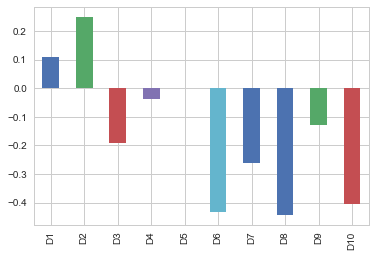

In [31]:
##시각화
#bar_plot

((sum_return_T+1).prod()-1).plot(kind='bar')
plt.show()

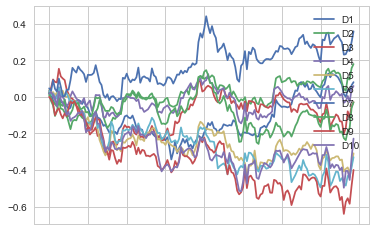

In [41]:
##누적 수익률 곡선
#line plot
plt.figure(figsize = (100,50))
log_sum_return_T = np.log(sum_return_T+1)
cum_return_total = pd.DataFrame(index = sum_return_T.index,columns= sum_return_T.columns)
for index in log_sum_return_T.index:
    if index == '1999-11-19':
        cum_return_total.loc[index] = log_sum_return_T.loc['1999-11-19']
    else:
        cum_return_total.loc[index]= (log_sum_return_T.loc[:index]).cumsum().loc[index]
    
cum_return_total.plot(kind='line')
plt.show()

# 3.beta

In [12]:
##beta_10분위 나누기
result = result.dropna()
years = np.sort(result['Year'].unique())
months = np.sort(result['Month'].unique())
days = np.sort(result['Day'].unique())
next_result = result.drop(['tVol','iVol'],axis=1).sort_values(by=['Year','Month','Day','Beta']).copy()
decile_list = []
for year in years:
    
    check_df = next_result[next_result['Year']==year]
    
    for month in months:
        if month not in check_df['Month'].unique():
            pass
        else:
            for day in days:
                if day in check_df[check_df['Month']==month]['Day'].unique():
                    print(day)

                    bp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').quantile(0.1)['Beta']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').copy()
                    temp2 = temp1[temp1['Beta']<=bp1]
                    temp2['decile'] = 'D1'
                    decile_list.append(temp2['decile'].values)
                    print('1분위',bp1,len(temp2))

                    bp2 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').quantile(0.2)['Beta']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').copy()
                    temp2 = temp1[(temp1['Beta']> bp1)&(temp1['Beta']<=bp2)]
                    temp2['decile'] = 'D2'
                    decile_list.append(temp2['decile'].values)
                    print('2분위',bp2,len(temp2))

                    bp3 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').quantile(0.3)['Beta']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').copy()
                    temp2 = temp1[(temp1['Beta']> bp2)&(temp1['Beta']<=bp3)]
                    temp2['decile'] = 'D3'
                    decile_list.append(temp2['decile'].values)
                    print('3분위',bp3,len(temp2))

                    bp4 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').quantile(0.4)['Beta']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').copy()
                    temp2 = temp1[(temp1['Beta']> bp3)&(temp1['Beta']<=bp4)]
                    temp2['decile'] = 'D4'
                    decile_list.append(temp2['decile'].values)
                    print('4분위',bp4,len(temp2))

                    bp5 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').quantile(0.5)['Beta']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').copy()
                    temp2 = temp1[(temp1['Beta']> bp4)&(temp1['Beta']<=bp5)]
                    temp2['decile'] = 'D5'
                    decile_list.append(temp2['decile'].values)
                    print('5분위',bp5,len(temp2))

                    bp6 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').quantile(0.6)['Beta']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').copy()
                    temp2 = temp1[(temp1['Beta']> bp5)&(temp1['Beta']<=bp6)]
                    temp2['decile'] = 'D6'
                    decile_list.append(temp2['decile'].values)
                    print('6분위',bp6,len(temp2))


                    bp7 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').quantile(0.7)['Beta']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').copy()
                    temp2 = temp1[(temp1['Beta']> bp6)&(temp1['Beta']<=bp7)]
                    temp2['decile'] = 'D7'
                    decile_list.append(temp2['decile'].values)
                    print('7분위',bp7,len(temp2))    

                    bp8 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').quantile(0.8)['Beta']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').copy()
                    temp2 = temp1[(temp1['Beta']> bp7)&(temp1['Beta']<=bp8)]
                    temp2['decile'] = 'D8'
                    decile_list.append(temp2['decile'].values)
                    print('8분위',bp8,len(temp2))

                    bp9 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').quantile(0.9)['Beta']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').copy()
                    temp2 = temp1[(temp1['Beta']> bp8)&(temp1['Beta']<=bp9)]
                    temp2['decile'] = 'D9'
                    decile_list.append(temp2['decile'].values)
                    print('9분위',bp9,len(temp2))

                    bp10 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').quantile(1)['Beta']
                    temp1 = next_result[(next_result['Month']==month)& (next_result['Year']==year)&(next_result['Day']==day)].sort_values(by='Beta').copy()
                    temp2 = temp1[(temp1['Beta']> bp9)&(temp1['Beta']<=bp10)]
                    temp2['decile'] = 'D10'
                    decile_list.append(temp2['decile'].values)
                    print('10분위',bp10,len(temp2))          

                else:
                    pass
deciles =[]
for decile in decile_list:
    deciles.extend(decile)
print(len(deciles))
print(len(next_result))
next_result['decile'] = deciles
next_result = next_result.reset_index(drop = True)
next_result.head(50) 

19
1분위 60.26445568952554 69
2분위 72.58263471964275 69
3분위 80.24941985490592 69
4분위 87.83898288926892 69
5분위 94.5221542993214 69
6분위 101.61684797613037 68
7분위 107.18501513235262 69
8분위 114.04209051896339 69
9분위 123.57515224809073 69
10분위 181.6260035634633 69
24
1분위 59.30268827959124 69
2분위 71.70740924512688 69
3분위 80.08091930969145 69
4분위 87.31282354684191 69
5분위 93.69825731522516 69
6분위 101.50925804504553 68
7분위 106.41946732515092 69
8분위 114.32193314082652 69
9분위 124.78391911178402 69
10분위 182.4319118404873 69
25
1분위 59.063614285271996 69
2분위 71.55794384296463 69
3분위 80.36977866135948 69
4분위 87.80009752417357 68
5분위 93.85680195759936 69
6분위 101.80606173815315 69
7분위 106.74303989981105 68
8분위 114.59287077422783 69
9분위 124.25838676400086 69
10분위 182.05425678921472 69
26
1분위 59.82911606342927 69
2분위 71.22722913591117 69
3분위 80.30900885674978 69
4분위 87.6679382120339 68
5분위 94.50633864662092 69
6분위 101.49222668073509 69
7분위 107.36574221817894 68
8분위 114.29989421112136 69
9분위 125.060864257116

16
1분위 58.19197110075747 69
2분위 71.58896137923217 69
3분위 81.21797710157401 68
4분위 88.86751127685693 69
5분위 94.25398230896204 68
6분위 100.66815271494892 69
7분위 107.53449684748608 68
8분위 116.02626476181452 69
9분위 123.28161696261631 68
10분위 169.47074429880246 69
17
1분위 58.27259398730395 69
2분위 71.822572778851 69
3분위 81.36762390068682 68
4분위 88.44875369287871 69
5분위 95.14547413945738 68
6분위 100.37381013502949 69
7분위 108.03817205625833 68
8분위 115.68982879877787 69
9분위 122.60296856903638 68
10분위 169.240568746535 69
18
1분위 58.11812492825874 69
2분위 71.81311714230084 69
3분위 81.13749011652155 68
4분위 88.60022181322306 69
5분위 95.02308101358173 68
6분위 100.27889970715151 69
7분위 107.9753388486707 68
8분위 115.58513634649395 69
9분위 122.52020976996076 68
10분위 169.56990924146965 69
23
1분위 59.4035862155415 69
2분위 73.1665842997604 69
3분위 81.76495335180962 68
4분위 89.37791033735786 69
5분위 95.6645090500798 68
6분위 101.44587823673055 69
7분위 108.31196774830823 68
8분위 116.47365966425836 69
9분위 123.86752962072737 68

9분위 133.2486503292028 68
10분위 170.3059893703499 69
18
1분위 61.38916260902499 69
2분위 78.02503873364864 68
3분위 87.80283068212506 68
4분위 97.16588789728415 69
5분위 104.91191513693573 68
6분위 110.55720084153637 68
7분위 116.48241771628696 69
8분위 125.17647061183638 68
9분위 133.32169023217116 68
10분위 170.26231505811984 69
19
1분위 60.581034033567214 69
2분위 78.53478106410894 68
3분위 87.64448553342977 69
4분위 97.30098425453627 68
5분위 104.45503715435636 69
6분위 110.13052055846407 68
7분위 116.62228521833313 68
8분위 124.91271242461866 69
9분위 134.7445428066993 68
10분위 165.4196303327863 69
24
1분위 61.44022789006702 69
2분위 79.73158442893202 68
3분위 87.53718192676811 68
4분위 98.00246320918795 69
5분위 105.56818395513605 68
6분위 111.27989985897139 68
7분위 117.87184343306438 69
8분위 125.96766572003048 68
9분위 135.18836978077763 68
10분위 169.36567058991278 69
25
1분위 61.74402711802426 69
2분위 79.72568377919099 68
3분위 88.00691064697796 68
4분위 97.45145635666788 69
5분위 105.80369810563712 68
6분위 111.43594745790475 68
7분위 118.0222599

8분위 129.22254951240689 69
9분위 140.1930095577965 68
10분위 172.30683004209862 69
4
1분위 58.90073678464556 69
2분위 76.63526146521501 68
3분위 87.57479878856373 69
4분위 95.93356251808439 68
5분위 103.6709093089858 69
6분위 111.72339772012698 68
7분위 120.5577296402297 68
8분위 129.20416317805257 69
9분위 140.24562195138589 68
10분위 172.48387568224956 69
9
1분위 59.78429746295665 69
2분위 76.22313755624522 68
3분위 87.83824735557003 69
4분위 96.0292671675199 68
5분위 103.90346061754705 69
6분위 111.70559568932688 68
7분위 120.13950794443181 68
8분위 128.69578029705795 69
9분위 140.43406275503366 68
10분위 172.7676018534518 69
10
1분위 59.813838498944065 69
2분위 76.09709132884042 68
3분위 87.84449952740367 69
4분위 96.03571480647437 68
5분위 103.88781392888592 69
6분위 111.80681762440555 68
7분위 120.40268023416027 68
8분위 128.59498774612686 69
9분위 140.45251461276894 68
10분위 172.68435763984348 69
11
1분위 60.55422387139056 69
2분위 76.56661836294629 68
3분위 87.40408091137766 69
4분위 95.91074161803657 68
5분위 104.19271040871149 69
6분위 111.7403879141

6분위 113.04230072214776 68
7분위 121.32955886483495 69
8분위 130.28207041311853 69
9분위 144.47279859088763 69
10분위 183.71816981391385 69
1
1분위 61.160735096459376 69
2분위 77.0835469571346 69
3분위 89.08461595794462 69
4분위 99.27925969788777 68
5분위 106.65544458972222 69
6분위 113.26147015281356 69
7분위 121.4756588350767 68
8분위 130.25676197221645 69
9분위 143.8660107341663 69
10분위 182.1825762547104 69
2
1분위 61.070903062858285 69
2분위 77.14949475104088 69
3분위 88.97920233872291 69
4분위 99.08693261423312 68
5분위 106.81846885051803 69
6분위 113.35041766088682 69
7분위 121.88309063098129 68
8분위 130.4500984412675 69
9분위 143.76523217661492 69
10분위 181.27419012316648 69
3
1분위 61.21086957677232 69
2분위 78.24224440273906 69
3분위 89.51719210438478 69
4분위 98.92066230022242 68
5분위 107.2573859983365 69
6분위 113.27449791146226 69
7분위 121.51982782155356 68
8분위 130.62237164507832 69
9분위 143.98592657459892 69
10분위 183.6283797660817 69
8
1분위 61.80029781703776 69
2분위 79.04371333001582 69
3분위 89.02507858118592 69
4분위 98.3219334929831

,Symbol,Year,Month,Day,Return,LagCap,Date,Beta,decile
0,A003190,1999,11,19,4.29,"9,782",1999-11-19,0.395940,D1
1,A007100,1999,11,19,0.00,"15,300",1999-11-19,12.907964,D1
2,A000840,1999,11,19,1.53,466,1999-11-19,14.424761,D1
3,A002880,1999,11,19,0.00,"5,250",1999-11-19,17.194410,D1
4,A002240,1999,11,19,1.01,"164,824",1999-11-19,18.739252,D1
5,A033920,1999,11,19,-1.22,"21,034",1999-11-19,19.374787,D1
6,A003020,1999,11,19,0.00,"1,069",1999-11-19,23.090422,D1
7,A003240,1999,11,19,1.03,"493,236",1999-11-19,25.180309,D1
8,A000320,1999,11,19,3.07,"53,981",1999-11-19,29.131719,D1
9,A009030,1999,11,19,-50.00,"1,416",1999-11-19,30.038714,D1


In [14]:
##시총가중
next_result['LagCap'] = next_result['LagCap'].astype('str') 
next_result['LagCap'] = pd.to_numeric(next_result['LagCap'].apply(lambda x: x.replace(',',''))) #replace 는 str 형만 가능!
next_result['weighted_cap'] = next_result.groupby(['Year','Month','Day','decile'])['LagCap'].apply(lambda x: x/np.sum(x))
next_result['weighted_Return'] = next_result['weighted_cap'] * (next_result['Return']/100)
next_result.head(50)

,Symbol,Year,Month,Day,Return,LagCap,Date,Beta,decile,weighted_cap,weighted_Return
0,A003190,1999,11,19,4.29,9782.0,1999-11-19,0.395940,D1,0.000903,3.875371e-05
1,A007100,1999,11,19,0.00,15300.0,1999-11-19,12.907964,D1,0.001413,0.000000e+00
2,A000840,1999,11,19,1.53,466.0,1999-11-19,14.424761,D1,0.000043,6.584240e-07
3,A002880,1999,11,19,0.00,5250.0,1999-11-19,17.194410,D1,0.000485,0.000000e+00
4,A002240,1999,11,19,1.01,164824.0,1999-11-19,18.739252,D1,0.015221,1.537341e-04
5,A033920,1999,11,19,-1.22,21034.0,1999-11-19,19.374787,D1,0.001942,-2.369791e-05
6,A003020,1999,11,19,0.00,1069.0,1999-11-19,23.090422,D1,0.000099,0.000000e+00
7,A003240,1999,11,19,1.03,493236.0,1999-11-19,25.180309,D1,0.045549,4.691592e-04
8,A000320,1999,11,19,3.07,53981.0,1999-11-19,29.131719,D1,0.004985,1.530409e-04
9,A009030,1999,11,19,-50.00,1416.0,1999-11-19,30.038714,D1,0.000131,-6.538250e-05


In [15]:
##분위별 수익률
sum_return = pd.DataFrame(next_result.groupby(['Year','Month','Day','decile'])['weighted_Return'].sum())
sum_return = sum_return.reset_index()
sum_return['Date'] = sum_return['Year'].astype('str') +'-'+sum_return['Month'].astype('str')+'-'+sum_return['Day'].astype('str')

#컬럼 순서 재설정
sum_return_T = pd.DataFrame(sum_return.pivot('Date','decile','weighted_Return'),columns=['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10'])
#sum_return_T.to_csv('plot_beta_df.csv')
sum_return_T.head(50)

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10
Date,,,,,,,,,,
1999-11-19,0.023340,0.010211,0.030928,0.017939,0.037552,0.033497,0.047447,0.021708,-0.000329,0.017263
1999-11-24,-0.008480,-0.032624,0.019717,0.006916,-0.021420,-0.024093,-0.013587,-0.029994,-0.014065,0.009044
1999-11-25,-0.032491,-0.023371,0.046022,-0.021566,0.011689,0.009653,0.060203,-0.015733,-0.021288,-0.014816
1999-11-26,-0.018429,-0.056070,-0.013188,-0.020922,-0.017531,-0.017999,-0.046177,-0.014613,-0.062843,-0.015020
1999-12-1,-0.000179,0.026336,-0.003052,0.035032,0.014869,-0.009128,-0.014446,-0.013361,0.025424,-0.047173
1999-12-10,0.031058,0.060033,0.077712,0.037833,0.017620,0.060266,0.072790,0.047183,0.013911,0.085497
1999-12-15,-0.022256,-0.043159,-0.040955,-0.045520,-0.021360,-0.036706,-0.043568,-0.033692,-0.033319,-0.043218
1999-12-16,-0.002396,-0.003435,-0.011219,-0.009050,0.013692,-0.006069,-0.049548,-0.008442,-0.021242,-0.017896
1999-12-17,-0.006122,-0.018052,-0.008999,-0.014183,-0.027967,0.003828,-0.000880,0.035823,0.027872,-0.021979


In [ ]:
sum_return_T = pd.read_csv('plot_beta_df.csv')
date = sum_return_T['Date'].values
sum_return_T = sum_return_T.set_index(date).drop('Date',axis=1)
sum_return_T.head()

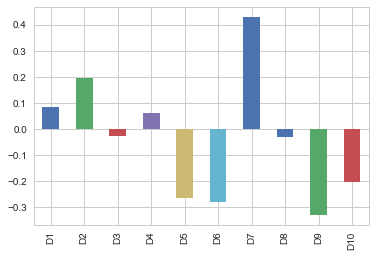

In [35]:
##시각화
#bar_plot

((sum_return_T+1).prod()-1).plot(kind='bar')
plt.show()

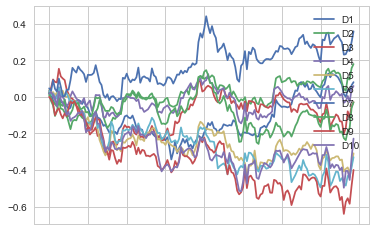

In [36]:
##누적 수익률 곡선
#line plot

log_sum_return_T = np.log(sum_return_T+1)
cum_return_total = pd.DataFrame(index = sum_return_T.index,columns= sum_return_T.columns)
for index in log_sum_return_T.index:
    if index == '1999-11-19':
        cum_return_total.loc[index] = log_sum_return_T.loc['1999-11-19']
    else:
        cum_return_total.loc[index]= (log_sum_return_T.loc[:index]).cumsum().loc[index]
    
cum_return_total.plot(kind='line')